# Introduction

Nama : Nindia Ekasuci Larasati

Batch : Hck - 030
________________________________________
**Background**

Dalam proses pencarian pekerjaan, pencari kerja tidak hanya mempertimbangkan posisi yang tersedia, tetapi juga kesesuaian dengan budaya perusahaan, struktur organisasi, dan peluang pengembangan karir. Informasi seperti deskripsi perusahaan dan jumlah karyawan memberikan wawasan penting mengenai:

•	Budaya dan nilai perusahaan: Mengetahui apakah perusahaan memiliki budaya yang mendukung keseimbangan kerja-hidup, inovasi, atau keberagaman.

•	Ukuran dan struktur organisasi: Memahami apakah perusahaan besar dengan struktur hierarki yang jelas atau perusahaan kecil yang lebih fleksibel dan dinamis.

•	Peluang karir dan pengembangan: Menilai apakah perusahaan menawarkan jalur karir yang jelas dan peluang untuk berkembang.

Dengan menggunakan teknik Natural Language Processing (NLP), pencari kerja dapat menganalisis deskripsi perusahaan untuk mengekstrak informasi terkait budaya, nilai, dan fokus utama perusahaan, serta mengklasifikasikan perusahaan berdasarkan ukuran dan jumlah karyawan. Hal ini memungkinkan pencari kerja untuk menyesuaikan pilihan mereka dengan perusahaan yang paling sesuai dengan tujuan karir dan nilai pribadi mereka.
________________________________________
**Objektif**

•	Menganalisis deskripsi perusahaan menggunakan teknik NLP untuk mengekstrak informasi terkait budaya, nilai, dan fokus utama perusahaan.

•	Mengklasifikasikan perusahaan berdasarkan ukuran dan jumlah karyawan untuk memberikan gambaran tentang struktur organisasi dan peluang karir.

•	Memberikan wawasan kepada pencari kerja untuk menyesuaikan pilihan mereka dengan perusahaan yang sesuai dengan tujuan karir dan nilai pribadi mereka.

•	Menganalisis hubungan antara ukuran perusahaan dan deskripsi mereka untuk membantu dalam penentuan pilihan karir yang paling sesuai.
________________________________________
Referensi:
1.	What Size Company Is Right For You?

2.	NLP Tools for Recruitment: Understanding Candidate Fit
________________________________________

# Import Lybrary

In [1]:
# Import Libraries

import re
import nltk
import pickle
import string
import os, shutil, json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as tf_hub

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils.class_weight import compute_class_weight


import tensorflow.keras.backend as K
from tensorflow.keras import Input, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, TextVectorization, InputLayer, Input, Masking, LayerNormalization, Dense, LSTM, Bidirectional, Dropout, Reshape, SpatialDropout1D, BatchNormalization
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, Callback, ReduceLROnPlateau, CSVLogger, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import GlorotUniform

# Check TensorFlow version
print(tf.__version__)

2025-08-26 18:15:42.793359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756206942.944467   49957 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756206942.987834   49957 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756206943.331865   49957 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756206943.331895   49957 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756206943.331897   49957 computation_placer.cc:177] computation placer alr

2.19.1


# Data Loading

In [2]:
df = pd.read_csv('companies.csv', encoding="utf-8")
df.head()

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle


In [3]:
df.info()
df.nunique()

# Menampilkan total missing values dataset
print('Total jumlah missing values dataset adalah',df.isna().sum().sum())

# Menampilkan total duplikat dataset
print('Total jumlah duplikat dataset adalah',df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6063 entries, 0 to 6062
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    6063 non-null   int64  
 1   name          6063 non-null   object 
 2   description   5999 non-null   object 
 3   company_size  5474 non-null   float64
 4   state         6060 non-null   object 
 5   country       6063 non-null   object 
 6   city          6063 non-null   object 
 7   zip_code      6055 non-null   object 
 8   address       6058 non-null   object 
 9   url           6063 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 473.8+ KB
Total jumlah missing values dataset adalah 669
Total jumlah duplikat dataset adalah 0


 <div align="justify">

Dari hasil pengecekan, terdapat 669 data duplikat pada kolom description, company size, state, country, zip_code dan address. Keberadaan missing value perlu ditangani karena jika tidak ditangani maka tidak bisa dilakukan pengolahan lebih lanjut dan menimbulkan data bias dalam analisis. Oleh karena itu, pada tahap data wrangling nanti, akan dihandling missing value khususnya pada kolom description dan company_size karena kedua kolom tersebut akan menjadi fitur dan target pada topik NLP kali ini. Proses handling missing value dilakukan pada saat data wrangling tidak pada feature engginering karena saat Exploratory Data Analysis (EDA) membutuhkan data yang sudah bersih untuk menganalisa datanya. Selain itu, data ini tidak memiliki data duplikat karena masing - masing company memiliki id yang unik jadi tidak memungkinkan untuk terjadinya data yang duplikat.

## Data Wrangling

In [4]:
# Mengecek persentase missing value
missing_percentage1 = df['description'].isnull().mean() * 100
missing_percentage2 = df['company_size'].isnull().mean() * 100

print(f"jumlah missing value pada kolom description adalah {missing_percentage1}%")
print(f"jumlah missing value pada company_size adalah {missing_percentage2}%")

jumlah missing value pada kolom description adalah 1.0555830446973444%
jumlah missing value pada company_size adalah 9.71466270823025%


 <div align="justify">

Pada tahap ini, dilakukan pembersihan data agar siap digunakan untuk analisis lebih lanjut maupun pemodelan. Langkah yang dilakukan dalam proses ini adalah handling missing value pada kolom description dan company_size. Handling missing value dilakukan dengan cara menghapus data yang mengandung nilai NaN. Hal ini dilakukan karena jumlah missing value pada kedua kolom tersebut tidak banyak hanya 1% pada description dan 9% pada company_size dari 6063 data. Dengan di handling missing value dataset menjadi lebih akurat dan konsisten untuk digunakan di tahap berikutnya.

In [5]:
# Menangani missing value dengan menghapus nilai NaN
df = df.dropna(subset=['description', 'company_size'])

In [6]:
# Menampilkan total missing values hanya pada kolom 'description' dan 'company size'
print('Total jumlah missing values pada kolom description dan company size adalah', df[['description', 'company_size']].isna().sum().sum())

Total jumlah missing values pada kolom description dan company size adalah 0


 <div align="justify">
 
Dalam Natural language Processing (NLP) hanya menggunakan 1 fitur dan 1 target dalam hal ini yang dijadikan fitur adalah `description` dan yang akan menjadi target adalah `company_size`. Jadi, kolom selain itu akan dihapus dan pada `company_size` dilakukan segmentasi lagi dari awalnya 7 kelas (1-7) menjadi 3 kelas dengan kategori small (1 - 3), medium (4-5) dan high(6-7). Hal ini dilakukan agar memudahkan model dalam membaca pola.

In [7]:
# Menghapus beberapa kolom dari DataFrame
df = df.drop(columns=['company_id', 'name', 'state', 'country', 'city', 'zip_code', 'address', 'url']) 

In [8]:
# Menginisialisasi list untuk company_type
type_company = []

# Menentukan tipe perusahaan berdasarkan nilai company_size
for x in df['company_size']:
    if x < 3:
        type_company.append('small')
    elif x < 5:
        type_company.append('medium')
    else:
        type_company.append('large')

# Menambahkan kolom company_type ke DataFrame
df['company_type'] = type_company

In [9]:
df = df.drop(columns=['company_size'])
df

,description,company_type
0,"At IBM, we do more than work. We create. We cr...",large
1,Every day millions of people feel the impact o...,large
2,"GE Power, part of GE Vernova, is a world energ...",large
3,Official LinkedIn of Hewlett Packard Enterpris...,large
4,We’re a cloud technology company that provides...,large
...,...,...
6058,"""Beauty can be many things to many people. Our...",medium
6059,"Pros2Plan, a division of Spinnaker Services L...",small
6060,Ascendo Resources is a certified minority owne...,medium
6061,"The Crox Group, Head Quartered in Chicago, wit...",small


<div align="justify">

Setelah data di handling missing value data menjadi 5442 rows dari total awal 6063 rows. Ini menunjukkan bahwa missing value dihapus sekitar 10.24% darijumlah data. Menurut [Yiran Dong](https://pmc.ncbi.nlm.nih.gov/articles/PMC3701793/) pada jurnalnya pada tahun 2013, untuk sebagian besar dataset, tingkat missing data di bawah 10% dapat ditangani menggunakan penghapusan atau imputasi tanpa bias yang signifikan. Namun, untuk tingkat missing data di atas 20%, sangat penting untuk menyelidiki alasan di balik missing data dan mempertimbangkan metode yang lebih canggih untuk menangani missing value.

# Exploratory Data Analysis (EDA)

Dilakukan eksplorasi pada data sebelum dilakukan pengolahan lebih advance.

>1. Bagaimana distribusi data pada masing masing kelas ?

/tmp/ipykernel_49957/524313256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='company_type', palette='Set2')


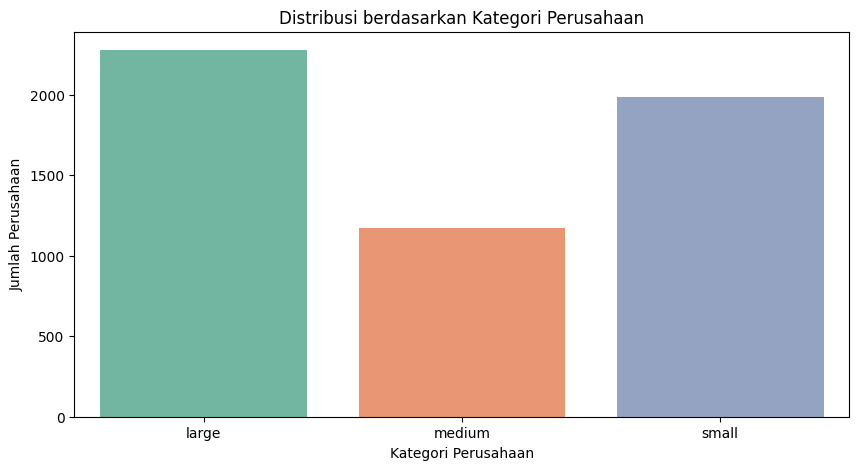

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='company_type', palette='Set2')
plt.title('Distribusi berdasarkan Kategori Perusahaan')
plt.xlabel('Kategori Perusahaan')
plt.ylabel('Jumlah Perusahaan')
plt.show()

Visualisasi diatas memperlihatkan distribusi dari masing - masing kelas. 

Hasil Distribusi:

- Perusahaan Besar (Large): Kategori terbanyak dalam dataset.

- Perusahaan Kecil (Low): Kedua terbanyak, menunjukkan banyaknya perusahaan kecil yang terdaftar.

- Perusahaan Menengah (Medium): Kategori paling sedikit.
>---
Insight Bisnis:

- Perusahaan Besar (Large):

Dominasi dalam dataset, mencerminkan pengaruh besar di pasar dan kehadiran yang kuat di LinkedIn.


- Perusahaan Kecil (Low):

Banyaknya perusahaan kecil menunjukkan mereka lebih aktif di LinkedIn untuk menjangkau niche market atau pelanggan lokal.


- Perusahaan Menengah (Medium):

Jumlah lebih sedikit, menunjukkan mereka berada di tahap peralihan dan mungkin lebih fokus pada operasional internal.

>---


> 2. Frekuansi kata - kata apa saja yang paling sering keluar dari keseluruhan data ?

In [11]:
# Inisialisasi CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit dan transform data
X = vectorizer.fit_transform(df['description'])

# Menghitung frekuensi kata
word_freq = X.sum(axis=0).A1  # Menghitung frekuensi kata

# Mendapatkan nama kata yang sesuai
words = vectorizer.get_feature_names_out()

# Membuat DataFrame untuk menampilkan kata dan frekuensinya
word_freq_df = pd.DataFrame(zip(words, word_freq), columns=['word', 'frequency'])

# Mengurutkan kata berdasarkan frekuensi
top_words = word_freq_df.sort_values(by='frequency', ascending=False).head(10)

# Menampilkan top 10 kata
top_words


,word,frequency
22386,services,3886
23092,solutions,3014
6124,company,2712
4592,business,2624
5743,clients,2266
24484,technology,2101
27233,world,2013
18776,people,1867
6000,com,1811
22380,service,1758


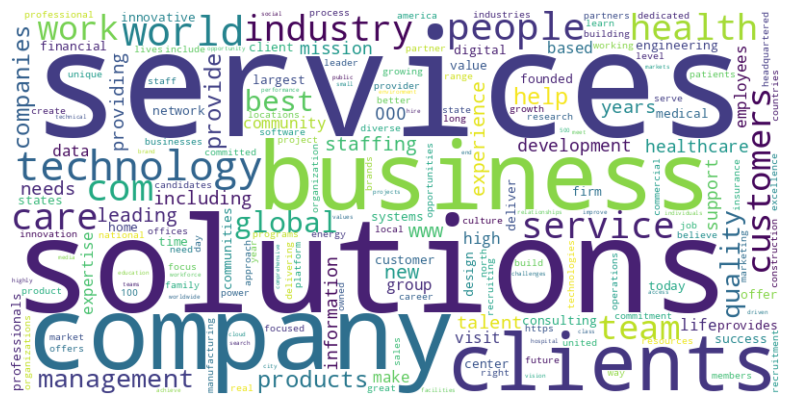

In [12]:
# Membuat dictionary dari kata dan frekuensinya
word_freq_dict = dict(zip(words, word_freq))

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud menggambarkan kata-kata yang paling sering muncul dalam suatu kumpulan teks. Semakin besar ukuran kata, semakin sering kata tersebut digunakan.

Tabel Frekuensi memberikan data numerik terkait seberapa sering kata-kata muncul.
 1. Analisis Deskripsi Perusahaan (Budaya, Nilai, Fokus Utama)
- Word cloud menunjukkan kata dominan seperti **services, solutions, company, business, clients, technology, people, world**.  
- Hal ini menggambarkan bahwa budaya perusahaan berorientasi pada **layanan, solusi, dan inovasi teknologi**.  
- Nilai utama yang sering muncul: **pelayanan, inovasi, skala global, dan orientasi klien/pelanggan**.  
- Insight: deskripsi perusahaan lebih menonjolkan **fungsi layanan dan solusi** dibanding aspek internal seperti budaya kerja atau keberlanjutan.

---

 2. Wawasan bagi Pencari Kerja
- Kata **clients, people, team, talent** menekankan pentingnya **hubungan manusia dan kolaborasi**.  
- Bagi pencari kerja, hal ini memberi sinyal bahwa **soft skills** (misalnya teamwork, komunikasi dengan klien) sama pentingnya dengan hard skills.  
- Kata **technology** dan **solutions** menunjukkan peluang karir yang kuat di bidang **inovasi dan teknologi**.

---

> 3. Kata - kata apa yang terbanyak paling sering muncul pada masing - masing kelas

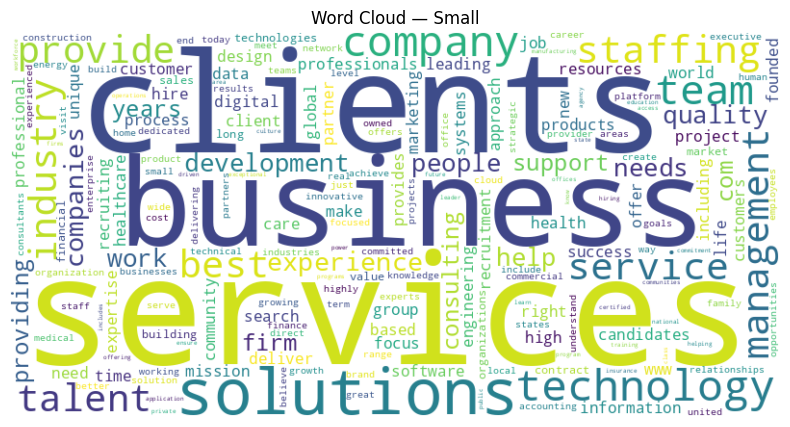

,Word,Frequency
12479,services,1373
3000,clients,1143
2407,business,1122
12862,solutions,1055
13697,technology,806
3224,company,771
13666,team,745
13083,staffing,647
7290,industry,637
12476,service,623


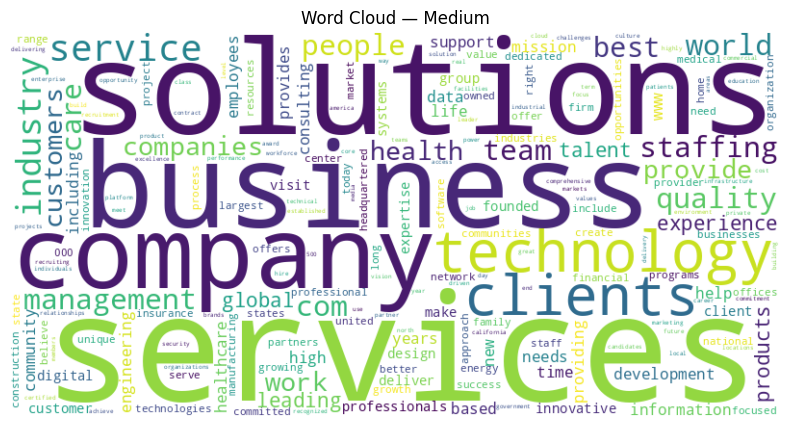

,Word,Frequency
9593,services,1024
9882,solutions,779
1884,business,627
2537,company,612
10502,technology,553
2359,clients,547
9588,service,464
5604,industry,390
10041,staffing,372
8616,quality,366


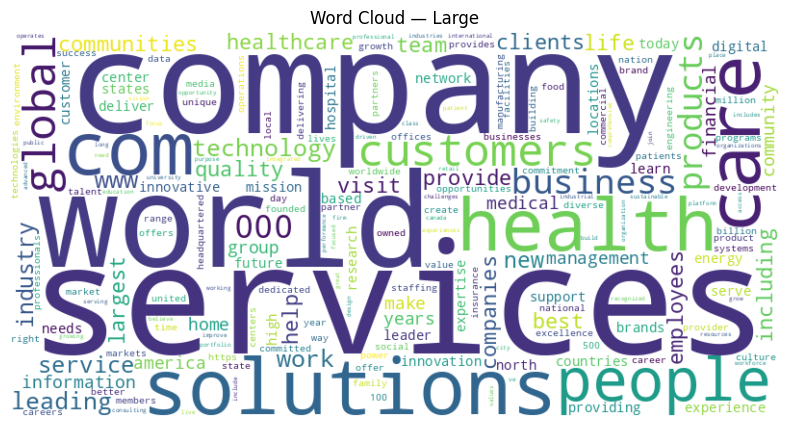

,Word,Frequency
13933,services,1489
3833,company,1329
16922,world,1285
14365,solutions,1180
3030,care,1099
3747,com,1080
7625,health,1058
11691,people,1021
4546,customers,919
7163,global,914


In [13]:
# Inisialisasi CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit dan transform semua data
X_all = vectorizer.fit_transform(df['description'].astype(str))

word_freq_by_size = {}
for size in ['small', 'medium', 'large']:
    mask = df['company_type'].eq(size)
    X = vectorizer.transform(df.loc[mask, 'description'].astype(str))  # pakai kolom 'description'
    counts = np.asarray(X.sum(axis=0)).ravel()
    vocab  = vectorizer.get_feature_names_out()
    freqs  = {w:int(c) for w,c in zip(vocab, counts) if c>0}
    word_freq_by_size[size] = freqs

for size, freqs in word_freq_by_size.items():
    if not freqs:
        print(f"Tidak ada frekuensi untuk kelas: {size}")
        continue
    # Buat word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white')\
                .generate_from_frequencies(freqs)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud — {size.capitalize()}'); plt.show()

    # Buat tabel frekuensi top 10 kata
    word_freq_df = (pd.DataFrame(freqs.items(), columns=['Word','Frequency'])
                      .sort_values('Frequency', ascending=False).head(10))
    display(word_freq_df)


 Perbandingan Berdasarkan Ukuran Perusahaan

 Small Companies
- **Kata dominan:** services, clients, solutions, business, technology, staffing, talent.  
- **Fokus narasi:** kedekatan dengan klien, fleksibilitas, tim kecil, dan spesialisasi niche.  
- **Nilai utama:** personal, fleksibel, client-oriented.  
- **Cocok untuk:** pencari kerja yang ingin pengalaman langsung, peran multi-fungsi, dan lingkungan kerja yang lebih dekat.  

---

 Medium Companies
- **Kata dominan:** services, solutions, company, business, technology, clients, quality, industry.  
- **Fokus narasi:** layanan & solusi tetap dominan, mulai menekankan kualitas, efisiensi, dan kesehatan.  
- **Nilai utama:** keseimbangan antara customer focus dan internal process.  
- **Cocok untuk:** pencari kerja yang menginginkan stabilitas, sistem lebih terstruktur, namun tetap dinamis.  

---

 Large Companies
- **Kata dominan:** world, services, company, solutions, health, care, global, research, customers.  
- **Fokus narasi:** branding global, inovasi, healthcare, research, dan tanggung jawab sosial.  
- **Nilai utama:** skala internasional, inovasi, stabilitas, dampak sosial.  
- **Cocok untuk:** pencari kerja yang menginginkan karir jangka panjang, stabilitas, serta exposure internasional.  

---

 Hubungan Ukuran Perusahaan & Deskripsi
- **Small companies** → narasi lebih personal & spesifik → cenderung menekankan hubungan dengan klien serta fleksibilitas.  
- **Medium companies** → narasi mulai menekankan kualitas, efisiensi, serta struktur internal organisasi.  
- **Large companies** → narasi lebih global & makro → menekankan skala internasional, inovasi, dan tanggung jawab sosial.  

---

 Kesimpulan
- Deskripsi perusahaan menekankan **layanan, solusi, dan teknologi** sebagai elemen inti.  
- Perbedaan narasi terlihat jelas berdasarkan ukuran perusahaan:  
  - **Small companies** → fleksibel & dekat dengan klien.  
  - **Medium companies** → seimbang antara orientasi eksternal & internal.  
  - **Large companies** → global, inovatif, dan berorientasi jangka panjang.  
- Insight ini dapat membantu pencari kerja menyesuaikan pilihan karir dengan nilai, budaya, dan tujuan profesional yang paling sesuai.
---


# Feature Engineering

## Teks Preprocessing

 <div align="justify">
 
Teks preprocessing dalam Natural Language Processing (NLP) penting untuk mempermudah pemrosesan data. Proses ini menghilangkan bagian-bagian teks yang tidak perlu, seperti tanda baca, angka, atau kata-kata umum yang tidak memberikan informasi penting (stopwords). Dengan cara ini, model bisa fokus pada kata-kata yang lebih relevan. Selain itu, preprocessing juga membantu mengubah kata-kata yang memiliki bentuk berbeda menjadi bentuk dasar yang lebih konsisten, misalnya "running" menjadi "run". Proses ini tidak hanya membuat data lebih bersih, tetapi juga mempercepat proses analisis dan meningkatkan hasil dari model. Intinya, preprocessing memastikan data yang diproses lebih mudah dipahami dan lebih efisien untuk dianalisis.

In [14]:
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the English stopwords and the lemmatizer
stpwds_en = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Create a function for text preprocessing
def text_preprocessing_en(text):
    # Case folding (convert to lowercase)
    text = text.lower()

    # Mention removal (remove @mentions)
    text = re.sub("@[A-Za-z0-9_]+", " ", text)

    # Hashtags removal (remove #hashtags)
    text = re.sub("#[A-Za-z0-9_]+", " ", text)

    # Newline removal
    text = re.sub(r"\\n", " ", text)

    # Whitespace removal
    text = text.strip()

    # Non-letter removal (except apostrophes for contractions)
    text = re.sub(r"[^\w\s']", " ", text)  # Keep apostrophes in words like "don't" and "it's"

    # Tokenization (splitting into words)
    tokens = word_tokenize(text)

    # Stopwords removal
    tokens = [word for word in tokens if word not in stpwds_en]

    # Lemmatization (using WordNetLemmatizer)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove apostrophes from tokens after lemmatization
    tokens = [word.replace("'", "") for word in tokens]

    # Combining tokens back into a string
    text = ' '.join(tokens)

    return text

[nltk_data] Downloading package punkt to /home/ser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# Applying Text Preprocessing to the Dataset

df['description_processed'] = df['description'].apply(lambda x:text_preprocessing_en(x))
df

,description,company_type,description_processed
0,"At IBM, we do more than work. We create. We cr...",large,ibm work create create technologist developer ...
1,Every day millions of people feel the impact o...,large,every day million people feel impact intellige...
2,"GE Power, part of GE Vernova, is a world energ...",large,ge power part ge vernova world energy leader p...
3,Official LinkedIn of Hewlett Packard Enterpris...,large,official linkedin hewlett packard enterprise g...
4,We’re a cloud technology company that provides...,large,cloud technology company provides organization...
...,...,...,...
6058,"""Beauty can be many things to many people. Our...",medium,beauty many thing many people job inspire peop...
6059,"Pros2Plan, a division of Spinnaker Services L...",small,pros2plan division spinnaker service llc compa...
6060,Ascendo Resources is a certified minority owne...,medium,ascendo resource certified minority owned awar...
6061,"The Crox Group, Head Quartered in Chicago, wit...",small,crox group head quartered chicago office noida...


## Target Conversion

<div align="justify">

Target conversion dalam Natural Language Processing (NLP) adalah proses mengubah label atau hasil yang ingin diprediksi ke dalam format yang bisa dimengerti oleh model machine learning. Misalnya, dalam klasifikasi teks, label kategori seperti "small", "medium atau "large" perlu diubah menjadi angka (seperti 0 1 dan 2) agar model bisa memprosesnya. Untuk tugas lain seperti text generation, teks akan diubah menjadi urutan angka atau token yang mewakili kata-kata. Proses ini penting agar data bisa diproses secara efisien oleh model dan menghasilkan prediksi yang lebih akurat.

In [16]:
df.company_type.unique()

array(['large', 'medium', 'small'], dtype=object)

In [17]:
# Change Target into Number

df['label'] = df['company_type'].replace({'small' : 0, 'medium' : 1, 'large' : 2})
df

/tmp/ipykernel_49957/1460438540.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['company_type'].replace({'small' : 0, 'medium' : 1, 'large' : 2})


,description,company_type,description_processed,label
0,"At IBM, we do more than work. We create. We cr...",large,ibm work create create technologist developer ...,2
1,Every day millions of people feel the impact o...,large,every day million people feel impact intellige...,2
2,"GE Power, part of GE Vernova, is a world energ...",large,ge power part ge vernova world energy leader p...,2
3,Official LinkedIn of Hewlett Packard Enterpris...,large,official linkedin hewlett packard enterprise g...,2
4,We’re a cloud technology company that provides...,large,cloud technology company provides organization...,2
...,...,...,...,...
6058,"""Beauty can be many things to many people. Our...",medium,beauty many thing many people job inspire peop...,1
6059,"Pros2Plan, a division of Spinnaker Services L...",small,pros2plan division spinnaker service llc compa...,0
6060,Ascendo Resources is a certified minority owne...,medium,ascendo resource certified minority owned awar...,1
6061,"The Crox Group, Head Quartered in Chicago, wit...",small,crox group head quartered chicago office noida...,0


In [18]:
# Mendapatkan distribusi target (frekuensi label) dan mengurutkan berdasarkan frekuensi
label_distribution = df['label'].value_counts().sort_values(ascending=False)

# Mengonversi Series ke DataFrame dan memberikan nama kolom
label_distribution = label_distribution.reset_index()
label_distribution.columns = ['Label', 'Count']

# Mengurutkan berdasarkan Label (0, 1, 2)
label_distribution = label_distribution.sort_values(by='Label', ascending=True)

# Menampilkan tabel distribusi target
label_distribution

,Label,Count
1,0,1990
2,1,1173
0,2,2279


 Analisis Distribusi Label:
1. **Label 0**:
   - Memiliki **1990** kemunculan.
   - Label ini lebih sering muncul dibandingkan dengan label 1, namun kurang dominan dibandingkan dengan label 2.

2. **Label 1**:
   - Memiliki **1173** kemunculan.
   - Label ini adalah yang paling sedikit muncul di antara ketiga label.

3. **Label 2**:
   - Memiliki jumlah terbanyak, yaitu **2279** kemunculan.
   - Label ini mendominasi dataset dan merupakan kategori yang paling umum.

## Data Spliting

In [19]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(df.description_processed,
                                                    df.label,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (4162,)
Val Size   :  (463,)
Test Size  :  (817,)


## Encoding 

<div align="justify">

One-Hot Encoding (OHE) mengubah label kategori menjadi format biner agar dapat diproses oleh model machine learning. Dengan menggunakan fungsi to_categorical, setiap label diubah menjadi vektor dengan panjang sesuai jumlah kategori, di mana hanya posisi yang sesuai dengan label yang memiliki nilai 1, dan sisanya 0. Misalnya, label 0 menjadi [1, 0, 0], label 1 menjadi [0, 1, 0], dan seterusnya. Proses ini memungkinkan model untuk memahami data kategori secara lebih efektif tanpa menganggap ada urutan antar label.

In [20]:
# Change Target to One Hot Encoding

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## Balancing Data

### Hitung Class Weights

In [21]:
y_train_idx = np.argmax(y_train_ohe, axis=1)
classes = np.unique(y_train_idx)
cw = compute_class_weight('balanced', classes=classes, y=y_train_idx)
class_weights = {int(c): float(w) for c, w in zip(classes, cw)}

# # BOOST kelas yang paling lemah, misal kelas 1:
# class_weights[1] *= 3.0

print("Class weights:", class_weights)

Class weights: {0: 0.9115199299167762, 1: 1.5466369379412859, 2: 0.7959456875119526}


# Model Build

<div align="justify">

Pada tahapan Model Building dalam NLP, langkah pertama adalah Text Vectorization, yang bertujuan untuk mengonversi teks menjadi representasi numerik yang dapat diproses oleh model. Langkah ini dimulai dengan mendefinisikan dan menyesuaikan TextVectorization layer, kemudian melakukan preprocessing pada data input menggunakan layer tersebut. Setelah itu, Word Embedding diterapkan untuk mengonversi kata-kata menjadi vektor representasi yang lebih padat dan bermakna. Selanjutnya, LSTM (Long Short-Term Memory) digunakan sebagai model untuk memproses urutan data, dengan input yang sudah berformat numerik, menggantikan bentuk teks asli. Tahapan ini memungkinkan model untuk menangkap hubungan dan pola dalam teks secara lebih efektif dan efisien.

### Text Vectorization

In [22]:
# Get Vocabularies

Vectorize = CountVectorizer() # untuk mencari tahu total vocab
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 277100 stored elements and shape (4162, 21691)>

In [23]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train]) # dalam dokumen ada berapa seberapa panjang elemen (panjang teks)

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  21691
Maximum Sentence Length :  253 tokens


<div align="justify">

Ukuran kosakata yang diperoleh adalah 21.691 dengan panjang sekuens maksimum 253. Selanjutnya, lapisan TextVectorization final dikonfigurasi menggunakan parameter tersebut dan diadaptasi sekali pada x_train untuk menjamin konsistensi prapemrosesan. Sebagai verifikasi, kami mendemonstrasikan konversi contoh teks mentah menjadi sekuens bilangan bulat yang telah dipadding, lalu meninjau 20 token dengan frekuensi kemunculan tertinggi.

In [24]:
# Text Vectorization
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len)

text_vectorization.adapt(X_train) 

W0000 00:00:1756206973.092694   49957 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [25]:
# Example Result

## Document example
print('Document example')
print(df.description_processed[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([df.description_processed[0]]))
print('Vector size : ', text_vectorization([df.description_processed[0]]).shape)

Document example
ibm work create create technologist developer engineer create partner create competitor re searching way make world work better technology infrastructure software consulting want work re help every creator turn let s create something change everything

Result of Text Vectorization
tf.Tensor(
[[2654   19  108  108 1884  649  448  108   43  108 2201  366 3651  113
    52   11   19  122    7  244  119   80  338   19  366   21   48 1423
   861  680   32  108 1201  256  447    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 

In [26]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 np.str_('service'),
 np.str_('company'),
 np.str_('solution'),
 np.str_('business'),
 np.str_('client'),
 np.str_('technology'),
 np.str_('u'),
 np.str_('customer'),
 np.str_('industry'),
 np.str_('world'),
 np.str_('team'),
 np.str_('people'),
 np.str_('product'),
 np.str_('com'),
 np.str_('care'),
 np.str_('community'),
 np.str_('health'),
 np.str_('work')]

### Word Embedding

<div align="justify">
Setelah teks diubah menjadi indeks token, setiap indeks dipetakan ke vektor berukuran 128 lewat Embedding layer. Lapisan ini belajar memahami makna dan kedekatan antar kata saat training, sehingga model lebih mudah menangkap pola dibanding kalau kita memakai angka indeks mentah. Hasil embedding ini lalu diteruskan ke model sekuens untuk mempelajari pola urutan kata.

Sebagai pengecekan, kita contohkan satu sampel teks mentah yang diubah menjadi deretan angka (sudah dipadding) oleh TextVectorization, lalu dipetakan oleh Embedding menjadi tensor berukuran (1, 253, 128) dengan keterangan:

1: ukuran batch,

253: panjang sekuens setelah padding,

128: dimensi vektor embedding per token.

In [27]:
# Embedding

embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform")

In [28]:
# Example Result

## Document example
print('Document example')
print(df.description_processed[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([df.description_processed[0]]))
print('Vector size : ', text_vectorization([df.description_processed[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([df.description_processed[0]])))
print('Vector size : ', embedding(text_vectorization([df.description_processed[0]])).shape)

Document example
ibm work create create technologist developer engineer create partner create competitor re searching way make world work better technology infrastructure software consulting want work re help every creator turn let s create something change everything

Result of  Text Vectorization
tf.Tensor(
[[2654   19  108  108 1884  649  448  108   43  108 2201  366 3651  113
    52   11   19  122    7  244  119   80  338   19  366   21   48 1423
   861  680   32  108 1201  256  447    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0

### LSTM

#### Step 1: Define and adapt TextVectorization layer

<div align="justify">
Pada tahap ini, teks diubah dulu jadi array string (n,1), lalu diproses dengan TextVectorization yang menurunkan huruf, menghapus tanda baca, dan memecah kata berbasis spasi. Kosakata dibatasi (max_tokens) agar fokus ke kata yang paling sering, dan panjang kalimat diseragamkan (output_sequence_length) lewat padding/truncation. Proses adapt hanya dijalankan di data train supaya tidak ada kebocoran informasi. Hasilnya berupa urutan indeks token yang siap masuk ke Embedding lalu model LSTM.

In [29]:
# diset menjadi vektor
X_train_vec = np.array(X_train, dtype=str).reshape(-1, 1)
X_val_vec = np.array(X_val, dtype=str).reshape(-1, 1)
y_train_vec = np.array(y_train, dtype=np.float32).reshape(-1, 1)
y_val_vec = np.array(y_val, dtype=np.float32).reshape(-1, 1)
X_test_vec = np.array(X_test, dtype=str).reshape(-1, 1)
y_test_vec = np.array(y_test, dtype=np.float32).reshape(-1, 1)

In [30]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len)
text_vectorization.adapt(X_train_vec)

#### Step 2: Preprocess the input data with TextVectorization

<div align="justify">
Pada langkah ini, layer text_vectorization yang sudah di‐adapt pada data latih dipakai untuk mengubah teks train/val/test menjadi urutan indeks dengan panjang seragam (padding/truncation otomatis). Karena kamusnya dikunci dari data latih, proses pada validasi dan test hanya transform—tanpa data leakage. Outputnya X_train_vectorized, X_val_vectorized, dan X_test_vectorized, siap masuk ke Embedding/LSTM.

In [31]:
X_train_vectorized = text_vectorization(X_train_vec)
X_val_vectorized = text_vectorization(X_val_vec)
X_test_vectorized = text_vectorization(X_test_vec)

#### Step 3: Define the Embedding layer

Pada langkah ini dibuat layer Embedding (input_dim=total_vocab, output_dim=128) untuk mengubah tiap indeks kata menjadi vektor padat 128-dim. Layer yang sama diterapkan ke X_train/val/test_vectorized dan siap masuk ke LSTM. 

In [32]:
embedding = Embedding(input_dim=total_vocab, output_dim=128)

In [33]:
X_train_embedded = embedding(X_train_vectorized)
X_val_embedded = embedding(X_val_vectorized)
X_test_embedded = embedding(X_test_vectorized)

2025-08-26 18:16:13.929696: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 539128832 exceeds 10% of free system memory.


#### Step 4: Define the LSTM model (input shape is now numerical, not string)

### i. Model Definition 

**Tujuan**

Klasifikasi teks multikelas dengan memanfaatkan pola urutan menggunakan LSTM.

**Arsitektur**

TextVectorization → indeks token berpanjang tetap

Embedding (128-d) → representasi kata padat

BiLSTM (64 → 32) + Dropout → tangkap konteks dua arah & kurangi overfitting

Dense + Softmax (3 kelas) → probabilitas kelas

**Parameter**

Panjang sekuens: hasil TextVectorization (mis. 253)

Embedding dim: 128

LSTM units: 32 (BiLSTM)

Dropout

Optimizer: Adam

Loss: CategoricalCrossentropy

Metrik: accuracy (opsional macro-F1)

<div align="justify">

Langkah selanjutnya yaitu menyiapkan dan membangun model klasifikasi berbasis BiLSTM untuk urutan embedding berukuran 128. Pertama, seed dikunci agar hasil reproducible, lalu fungsi ensure_float3d menjamin fitur numerik bertipe float32 dan berbentuk 3D (batch, seq_len, 128)—otomatis menambah dimensi jika masih 2D. Data latih/validasi (Xtr/Xva) dinormalkan bentuknya, sementara label one-hot (y_train/y_val) dipakai bersama sample_weight (diturunkan dari class_weights) untuk menangani ketakseimbangan kelas saat training. Arsitektur menerima panjang urutan variabel dengan Input(shape=(None, 128)) dan Masking(0.0) agar timestep padding 0 diabaikan, lalu dua lapis Bidirectional LSTM (64→32 unit) mengekstrak konteks dua arah, diikuti dropout dan dua lapis Dense kecil sebelum keluaran softmax 3 kelas.

In [34]:
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# =========================
# 1) Utilities: pastikan dtype & shape benar
# =========================
def ensure_float3d(X):
    """
    Mengubah X menjadi float32 dan shape 3D:
    - Jika X (N, 128) -> (N, 1, 128)
    - Jika X (N, L, 128) -> tetap
    - Mengatasi dtype string -> float32
    """
    X = np.asarray(X)
    if X.dtype.kind in {"U", "S", "O"}:  # string/object -> paksa ke float
        X = np.array(X, dtype=np.float32)
    else:
        X = X.astype(np.float32, copy=False)

    if X.ndim == 2:               # (N, 128) -> (N, 1, 128)
        X = X[:, None, :]
    if X.ndim != 3:
        raise ValueError(f"X harus berdimensi 3, dapat: {X.shape}")
    return X

Xtr = ensure_float3d(X_train_embedded)
Xva = ensure_float3d(X_val_embedded)

seq_len = Xtr.shape[1]     # contoh: 253
embed_dim = Xtr.shape[2]   # 128

# =========================
# 2) Siapkan label & sample_weight
# =========================
# y_* diasumsikan one-hot (N, 3)
y_train = np.asarray(y_train_ohe, dtype=np.float32)
y_val   = np.asarray(y_val_ohe, dtype=np.float32)

# class_weights: dict {class_index: weight}
y_train_int = y_train.argmax(axis=1)
sample_weight = np.array([class_weights[int(i)] for i in y_train_int], dtype=np.float32)

# =========================
# 3) Step 4 — Bangun LSTM yang benar
#     - Input menerima (None, embed_dim) agar seq_len fleksibel
#     - Masking aktif jika padding=0.0
# =========================
model_lstm_1 = Sequential([
    Input(shape=(None, embed_dim), dtype=tf.float32),
    Masking(mask_value=0.0),
    Bidirectional(LSTM(64, return_sequences=True, kernel_initializer=GlorotUniform(seed))),
    Dropout(0.1),
    Bidirectional(LSTM(32, return_sequences=False, kernel_initializer=GlorotUniform(seed))),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='selu'),
    Dropout(0.1),
    Dense(3, activation='softmax')
], name="bilstm_classifier")

model_lstm_1.summary()

Model: "bilstm_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, None, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, None, 128)      │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, None, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,235 (551.70 KB)

 Trainable params: 141,235 (551.70 KB)

 Non-trainable params: 0 (0.00 B)

>---
**Data & Pra-pemrosesan**

- Input: urutan embedding token per teks berukuran (T, 128); padding harus 0.0.

- Utilitas ensure_float3d memastikan fitur float32 dan bentuk (N, T, 128) (otomatis menambah dimensi jika masih 2D).

- Label: one-hot untuk 3 kelas (small, medium, large).

- Ketakseimbangan kelas ditangani dengan sample_weight dari class_weights.

**Arsitektur Model**

- Masking(0.0) → mengabaikan timestep hasil padding.

- Bidirectional(LSTM(64, return_sequences=True)) → konteks dua arah per timestep.

- Dropout(0.1)

- Bidirectional(LSTM(32, return_sequences=False)) → ringkasan urutan jadi vektor.

- Dense(16, relu) → Dropout(0.1) → Dense(8, selu) → Dropout(0.1)

- Dense(3, softmax) → probabilitas 3 kelas.

- Total parameter: 141.235 (± 0,55 MB), semuanya trainable.

**Alasan Desain**

- BiLSTM menangkap dependensi maju & mundur pada teks.

- Masking mencegah model belajar dari padding.

- Head kecil + dropout menjaga model tetap ringan dan menekan overfitting.
---

### ii. Model Training

<div align="justify">
Callback ini menghitung F1 macro dan F1 weighted pada validasi tiap akhir epoch: model memprediksi X_val, lalu metrik disimpan ke logs sebagai val_f1_macro/val_f1_weighted (agar bisa dimonitor), dicadangkan di self.buffer, dan dicetak untuk pemantauan. EarlyStopping kemudian memantau val_f1_macro (mode max), dengan patience=3 dan restore_best_weights=True, sehingga training otomatis berhenti saat F1 tidak membaik dan bobot terbaik dipulihkan.

In [35]:
# =========================
# 4) Callback F1 + EarlyStopping (urutan: F1 dulu!)
# =========================
class F1Callback(Callback):
    def __init__(self, X_val, y_val_ohe):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val_ohe
        self.buffer = {"val_f1_macro": [], "val_f1_weighted": []}

    def on_epoch_end(self, epoch, logs=None):
        probs = self.model.predict(self.X_val, verbose=0)
        y_pred = probs.argmax(axis=1)
        y_true = self.y_val.argmax(axis=1)
        f1m = f1_score(y_true, y_pred, average="macro")
        f1w = f1_score(y_true, y_pred, average="weighted")
        if logs is not None:
            logs["val_f1_macro"] = f1m
            logs["val_f1_weighted"] = f1w
        self.buffer["val_f1_macro"].append(f1m)
        self.buffer["val_f1_weighted"].append(f1w)
        print(f"\nval_f1_macro={f1m:.4f} | val_f1_weighted={f1w:.4f}")

f1cb = F1Callback(Xva, y_val)

early_stopping = EarlyStopping(
    monitor="val_f1_macro", mode="max",
    patience=3, restore_best_weights=True, verbose=1
)

<div align="justify">

Bagian ini menyusun dan melatih model. Pertama, model dikompilasi dengan loss CategoricalCrossentropy, optimizer Adam, dan metrik accuracy. Saat fit, data latih dan validasi diberikan bersama sample_weight (dihitung dari distribusi kelas) untuk menyeimbangkan kontribusi kelas pada label one-hot. Pelatihan dijalankan hingga 50 epoch dengan batch size 16 (bisa diturunkan ke 8 bila memori ketat), sementara f1cb menghitung F1 macro/weighted pada validation tiap epoch dan early_stopping menghentikan training lebih awal bila val_f1_macro tidak meningkat serta mengembalikan bobot terbaik. Objek history menyimpan kurva loss/accuracy (dan F1 dari callback) untuk analisis setelah pelatihan.

In [ ]:
# =========================
# 5) Compile & Training
#     - Gunakan sample_weight untuk menyeimbangkan kelas (one-hot)
#     - Jika memori ketat, coba batch_size=8
# =========================
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model_lstm_1.compile(
    loss=loss_fn,
    optimizer=optimizer,
    metrics=['accuracy']
)

history1 = model_lstm_1.fit(
    Xtr, y_train,
    validation_data=(Xva, y_val),
    epochs=50,
    batch_size=16,
    sample_weight=sample_weight,     
    callbacks=[f1cb, early_stopping],
    verbose=1
)

Epoch 1/50


2025-08-26 18:16:15.420581: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 539128832 exceeds 10% of free system memory.


261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.2897 - loss: 1.1069
val_f1_macro=0.1184 | val_f1_weighted=0.0767
261/261 ━━━━━━━━━━━━━━━━━━━━ 92s 320ms/step - accuracy: 0.3236 - loss: 1.1006 - val_accuracy: 0.2160 - val_loss: 1.1074 - val_f1_macro: 0.1184 - val_f1_weighted: 0.0767
Epoch 2/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.3582 - loss: 1.0880
val_f1_macro=0.3980 | val_f1_weighted=0.4712
261/261 ━━━━━━━━━━━━━━━━━━━━ 84s 321ms/step - accuracy: 0.4330 - loss: 1.0720 - val_accuracy: 0.5443 - val_loss: 1.0254 - val_f1_macro: 0.3980 - val_f1_weighted: 0.4712
Epoch 3/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.5157 - loss: 1.0386
val_f1_macro=0.4921 | val_f1_weighted=0.5375
261/261 ━━━━━━━━━━━━━━━━━━━━ 68s 260ms/step - accuracy: 0.5207 - loss: 1.0342 - val_accuracy: 0.5508 - val_loss: 1.0044 - val_f1_macro: 0.4921 - val_f1_weighted: 0.5375
Epoch 4/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.5363 - loss: 1.0176
val_f1_macro=0.46

<div align="justify">

Dilakukan Training dengan callback F1Callback, EarlyStopping (patience=3) dan batch size 16.

Perkembangan metrik

- Epoch 1: val_f1_macro 0.118 (baseline), val_acc 0.216.

- Epoch 2: val_f1_macro 0.398, val_acc 0.544.

- Epoch 3 (terbaik): val_f1_macro 0.492, val_acc 0.560, val_loss ~ 1.00.

- Epoch 4–6: fluktuasi 0.465–0.481 (tidak melampaui puncak).

Early stopping: Berhenti pada epoch 6 dan mengembalikan bobot terbaik epoch 3.

Berdasarkan hasil diatas dapat dikatakan bahwa model kurang baik karena F1-macro masih sekitar 0,49, artinya kinerja antar-kelas belum merata; khususnya kelas “medium” tertinggal jauh (F1 terendah) sehingga menurunkan rata-rata keseluruhan. Pola ini menunjukkan underfitting: akurasi train/val hanya 0,54–0,56 dengan val loss 1,0 dan metrik cepat mentok di epoch 3 lalu stagnan. Selain itu, ketidakseimbangan kelas dan sifat “medium” yang sering ambigu/mirip dengan small atau large membuat model cenderung bias ke kelas dominan. Sebelumnya telah dicoba juga menggunakan beberapa parameter seperti mengganti initializer, optimizier, dense, dropout namun hasilnya adalah model masih kurang baik dalam belajar. 

Telah dilakukan juga undersampling menggunakan random sampler. Namun, hasilnya menjadi lebih buruk dibanding sebelumnya. Hal ini dikarenakan dengan menggunakan undersamping data akan dipilih secara acak dan akan menyamakan jumlah tiap kelas ke kelas yang paling minoritas. Pada kasus ini semua kelas di balance menjadi 1176. Hal ini menyebabkan banyak informasi penting yang hilang sehingga menyebabkan hasil menjadi kurang baik. 

Karena undersampling menghasilkan hasil yang kurang baik maka dari itu dilakukan class weight atau pembobotan untuk menghandle data yang imbalance ini. Namun, walau telah di balancing dengan class weight metric yang dipakai adalah f1. Class weight hanya memengaruhi training loss agar model lebih bisa belajar khususnya pada kelas minor, sedangkan F1—terutama macro-F1—dipakai saat evaluasi/validasi untuk menilai apakah precision–recall tiap kelas benar-benar seimbang. Karena akurasi bisa menipu pada data tidak seimbang.

### iii. Model Evaluation


=== Validation Metrics ===
Accuracy     : 0.5508
F1 (macro)   : 0.4921
F1 (weighted): 0.5375

Classification Report:
              precision    recall  f1-score   support

       small     0.5854    0.5680    0.5766       169
      medium     0.2958    0.2100    0.2456       100
       large     0.6053    0.7113    0.6540       194

    accuracy                         0.5508       463
   macro avg     0.4955    0.4965    0.4921       463
weighted avg     0.5312    0.5508    0.5375       463



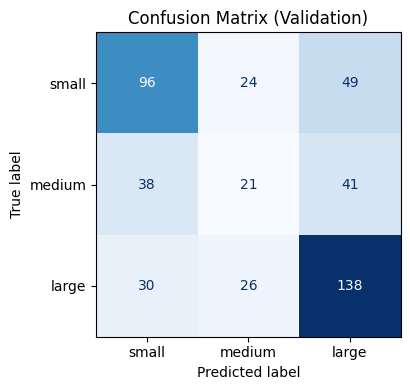

In [37]:
# =========================
# 6) Evaluation (sebelum improvement)
#     - Classification report
#     - Confusion matrix (plot)
# =========================
probs_val = model_lstm_1.predict(Xva, verbose=0)
y_pred_val = probs_val.argmax(axis=1)
y_true_val = y_val.argmax(axis=1)

acc = accuracy_score(y_true_val, y_pred_val)
f1_macro = f1_score(y_true_val, y_pred_val, average="macro")
f1_weighted = f1_score(y_true_val, y_pred_val, average="weighted")

print("\n=== Validation Metrics ===")
print(f"Accuracy     : {acc:.4f}")
print(f"F1 (macro)   : {f1_macro:.4f}")
print(f"F1 (weighted): {f1_weighted:.4f}\n")

target_names = ["small", "medium", "large"]  # sesuaikan urutan labelmu
print("Classification Report:")
print(classification_report(y_true_val, y_pred_val, target_names=target_names, digits=4))

cm = confusion_matrix(y_true_val, y_pred_val, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, cmap="Blues", values_format='d', colorbar=False)
plt.title("Confusion Matrix (Validation)")
plt.tight_layout()
plt.show()

Analisa 
- Akurasi 0.5508, F1-macro 0.4921, F1-weighted 0.5375 → performa keseluruhan moderat namun belum merata antar-kelas.

- Per kelas: small F1 0.5766, large F1 0.6540 (cukup baik), sedangkan medium F1 0.2456 utamanya karena recall 0.21 (banyak kelas medium tidak terdeteksi).

- Kelas medium sering salah ke kelas small (38) dan large (41) → batas antar-kelas medium vs lainnya masih kabur.

- Kelas large relatif stabil (TP 138/194); kelas small cukup baik (TP 96/169) tapi masih tertukar ke large (49).

Implikasi
Model cenderung bias ke small/large; kinerja medium masih sangat jelek.

# Improvement Model

#### i. Model Definition

<div align="justify">

Dilakukan improvement pada model dengan menambahkan AttentionPooling yang “mask-aware” setelah dua lapis BiLSTM yang sama-sama `return_sequences=True`, sehingga representasi dibangun dari seluruh timestep (bukan hanya vektor terakhir) dan fokus pada kata/frasa penting; mask tidak diteruskan agar kompatibel dengan `sample_weight`. Di awal ditambahkan SpatialDropout1D untuk ketahanan antar-timestep dan LayerNormalization setelah tiap BiLSTM guna menstabilkan distribusi aktivasi. Penanganan imbalance dibuat lebih aman dengan menghitung ulang class weight seimbang via `compute_class_weight` lalu membuat sample_weight_bal sesuai indeks kelas. Optimizer juga dipertegas menjadi Adam(amsgrad=True, lr=3e-4, clipnorm=1.0) agar training lebih stabil dan terhindar dari exploding gradient. Selain itu, direktori models/ dan reports/ diinisialisasi sejak awal. Perubahan ini bertujuan menaikkan recall kelas sulit (medium) dan membuat proses pelatihan lebih stabil dibanding arsitektur BiLSTM tanpa attention sebelumnya.

In [38]:
# ---------- Direktori output ----------
os.makedirs("models", exist_ok=True)
os.makedirs("reports", exist_ok=True)

# ---------- Kelas & bobot seimbang ----------
num_classes = y_train.shape[1]
y_train_int = y_train.argmax(axis=1)
classes = np.arange(num_classes)
class_w = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_int).astype(np.float32)
sample_weight_bal = class_w[y_train_int].reshape(-1,)   # 1D (N,)

# ---------- Attention Pooling (fix mask propagation) ----------
class AttentionPooling(tf.keras.layers.Layer):
    def __init__(self, units=64, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.proj = Dense(units, activation='tanh')
        self.score = Dense(1, activation=None)
        self.supports_masking = True
    def call(self, x, mask=None):
        # x: (B, T, D)
        s = self.score(self.proj(x))          # (B, T, 1)
        if mask is not None:
            mask = tf.cast(mask[:, :, None], tf.float32)  # (B, T, 1)
            s = s - 1e9 * (1.0 - mask)        # mask-out padding
        w = tf.nn.softmax(s, axis=1)          # (B, T, 1)
        ctx = tf.reduce_sum(w * x, axis=1)    # (B, D)
        return ctx
    def compute_mask(self, inputs, mask=None):
        # Penting: output tidak lagi berdimensi waktu → jangan teruskan mask
        return None

# ---------- Builder: BiLSTM + Attention ----------
def build_bilstm_attention(embed_dim, num_classes,
                           lstm_units=(64,32),
                           p_spatial=0.2, p_drop=0.2,
                           l2=1e-6, mask_value=0.0,
                           recurrent_dp=0.2, seed=20):
    reg = regularizers.l2(l2)
    inp = Input(shape=(None, embed_dim), dtype=tf.float32)
    x = Masking(mask_value=mask_value)(inp)
    x = SpatialDropout1D(p_spatial)(x)

    x = Bidirectional(LSTM(lstm_units[0], return_sequences=True,
                           kernel_regularizer=reg,
                           recurrent_dropout=recurrent_dp,
                           kernel_initializer=GlorotUniform(seed)))(x)
    x = LayerNormalization()(x)
    x = Dropout(p_drop)(x)

    x = Bidirectional(LSTM(lstm_units[1], return_sequences=True,
                           kernel_regularizer=reg,
                           recurrent_dropout=recurrent_dp,
                           kernel_initializer=GlorotUniform(seed)))(x)
    x = LayerNormalization()(x)
    x = Dropout(p_drop)(x)

    x = AttentionPooling(units=64)(x)          # pooling dengan mask-aware
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = Dropout(p_drop)(x)
    out = Dense(num_classes, activation='softmax')(x)

    return Model(inp, out, name="bilstm_attention")

# ---------- Callback F1 (sinkron dengan ES/CKPT/RLR) ----------
class F1Callback(Callback):
    def __init__(self, X_val, y_val_ohe):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val_ohe
        self.buffer = {"val_f1_macro": [], "val_f1_weighted": []}
    def on_epoch_end(self, epoch, logs=None):
        probs = self.model.predict(self.X_val, verbose=0)
        y_pred = probs.argmax(axis=1)
        y_true = self.y_val.argmax(axis=1)
        f1m = f1_score(y_true, y_pred, average="macro")
        f1w = f1_score(y_true, y_pred, average="weighted")
        if logs is not None:
            logs["val_f1_macro"] = f1m
            logs["val_f1_weighted"] = f1w
        self.buffer["val_f1_macro"].append(f1m)
        self.buffer["val_f1_weighted"].append(f1w)
        print(f"\nval_f1_macro={f1m:.4f} | val_f1_weighted={f1w:.4f}")

# ---------- Build & Compile ----------
tf.keras.backend.clear_session()
model_att = build_bilstm_attention(embed_dim=embed_dim, num_classes=num_classes,
                                   lstm_units=(64,32), p_spatial=0.2, p_drop=0.2,
                                   l2=1e-6, mask_value=0.0, recurrent_dp=0.2)

loss_fn = tf.keras.losses.CategoricalCrossentropy()   # TANPA label smoothing/focal (stabil)
opt = tf.keras.optimizers.Adam(learning_rate=3e-4, amsgrad=True)
opt.clipnorm = 1.0

model_att.compile(loss=loss_fn, optimizer=opt, metrics=['accuracy'])
model_att.summary()

Model: "bilstm_attention"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None, 128) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking (Masking)   │ (None, None, 128) │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None, 128) │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, None, 128) │          0 │ masking[0][0]     │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any (Any)           │ (None, None)      │          0 │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, None, 128) │     98,816 │ spatial_dropout1… │
│ (Bidirectional)     │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, None, 128) │        256 │ bidirectional[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, None, 128) │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, None, 64)  │     41,216 │ dropout[0][0],    │
│ (Bidirectional)     │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 64)  │        128 │ bidirectional_1[… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, None, 64)  │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_pooling   │ (None, 64)        │      4,225 │ dropout_1[0][0],  │
│ (AttentionPooling)  │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ attention_poolin… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 3)         │         99 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 146,820 (573.52 KB)

 Trainable params: 146,820 (573.52 KB)

 Non-trainable params: 0 (0.00 B)

<div align="justify">

Model menerima urutan embedding (None, None, 128) lalu Masking(0.0) mengabaikan padding; node NotEqual dan Any yang terlihat hanyalah operasi internal untuk membuat mask (bukan layer trainable). Setelah SpatialDropout1D, dua Bidirectional LSTM mengekstrak konteks dua arah: lapis pertama menjaga urutan (return_sequences=True) dan lapis kedua juga mengeluarkan urutan berukuran 64 (32 per arah). Masing-masing diikuti LayerNormalization (param 256 untuk dimensi 128, dan 128 untuk dimensi 64) dan Dropout untuk stabilitas. Seluruh urutan kemudian diringkas oleh AttentionPooling (mask-aware) yang menambah ~4,225 parameter dan memfokuskan pada token penting → keluaran vektor (None, 64). Head klasifikasi ringan Dense(32) → Dropout → Dense(3/softmax) menghasilkan probabilitas tiga kelas. Hitungan parameter utama konsisten: BiLSTM-1 98,816, BiLSTM-2 41,216, Attention 4,225, Dense(64→32) 2,080, Dense(32→3) 99; total sekitar 146,8K parameter (semuanya trainable). 

#### ii. Model Training

In [ ]:
# ---------- Training ----------
f1cb = F1Callback(Xva, y_val)
ckpt_path = "models/bilstm_attention_best.keras"
csvlog_path = "reports/bilstm_attention_history.csv"
callbacks = [
    f1cb,  # harus pertama
    ModelCheckpoint(ckpt_path, monitor="val_f1_macro", mode="max",
                    save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor="val_f1_macro", mode="max",
                      factor=0.5, patience=2, min_lr=5e-6, verbose=1),
    EarlyStopping(monitor="val_f1_macro", mode="max",
                  patience=4, restore_best_weights=True, verbose=1),
    CSVLogger(csvlog_path, append=False)
]

BATCH_SIZE = 16  # turunkan ke 8 jika memori mepet
history2 = model_att.fit(
    Xtr, y_train,
    validation_data=(Xva, y_val),
    epochs=30,
    batch_size=BATCH_SIZE,
    sample_weight=sample_weight_bal,     
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30


2025-08-26 18:23:36.344977: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 539128832 exceeds 10% of free system memory.


261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.3607 - loss: 1.1271
val_f1_macro=0.4209 | val_f1_weighted=0.4558

Epoch 1: val_f1_macro improved from None to 0.42089, saving model to models/bilstm_attention_best.keras
261/261 ━━━━━━━━━━━━━━━━━━━━ 140s 495ms/step - accuracy: 0.3815 - loss: 1.1059 - val_accuracy: 0.4514 - val_loss: 1.0805 - val_f1_macro: 0.4209 - val_f1_weighted: 0.4558 - learning_rate: 3.0000e-04
Epoch 2/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.3887 - loss: 1.0912
val_f1_macro=0.4469 | val_f1_weighted=0.4835

Epoch 2: val_f1_macro improved from 0.42089 to 0.44692, saving model to models/bilstm_attention_best.keras
261/261 ━━━━━━━━━━━━━━━━━━━━ 129s 495ms/step - accuracy: 0.4077 - loss: 1.0840 - val_accuracy: 0.4687 - val_loss: 1.0587 - val_f1_macro: 0.4469 - val_f1_weighted: 0.4835 - learning_rate: 3.0000e-04
Epoch 3/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.4435 - loss: 1.0706
val_f1_macro=0.4869 | val_f1_weighted=0.5326

Ep

<div align="justify">

Model BiLSTM+Attention dilatih 30-epoch dengan memilih batch size = 16. Sebelumnya dipilih batch size 32 dan 64 akan tetapi model tidak membaik. Dengan urutan rata-rata ±253 token dan arsitektur BiLSTM (64/32) + attention, jejak memori meningkat sehingga batch 32 memicu peringatan allocator (“Allocation of 539128832 exceeds 10% of free system memory”) dan berisiko OOM saat backprop melalui waktu. Menurunkan batch ke 16 memang menurunkan throughput, tetapi membuat training muat di memori dan lebih stabil.
Pada pemrosesan kali ini optimizer tidak diubah, tetap menggunakan Adam dikarenakan Adam lebih stabil dibandingkan optimizer lainnya. Sudah dilakukan juga penggantian optimizer RMSprop karena optimizer ini cenderung baik pada activation Relu, akan tetapi saat dicoba peformanya masih kerang baik dibandingkan dengan Adam walaupun learning rate pada RMSprop telah diubah - ubah. Pada improvement kali ini menggunakan Adam (AMSGrad, lr = 3e-4, clipnorm = 1.0) serta sample_weight seimbang. Callback yang dipakai adalah F1Callback (monitor val_f1_macro), ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, dan CSVLogger. Kinerja validasi naik bertahap dari val_f1_macro 0.421 (epoch 1) → 0.447 (epoch 2) → 0.487 (epoch 3), sempat turun (epoch 4), lalu mencapai terbaik di epoch 6: val_f1_macro = 0.5345, val_accuracy = 0.5637, val_loss = 0.9915. 
Setelah epoch 6 metrik berfluktuasi; LR otomatis diturunkan ke 1.5e-4 pada epoch 8 dan 7.5e-5 pada epoch 10, lalu EarlyStopping berhenti di epoch 10 dan mengembalikan bobot epoch terbaik (epoch 6).

#### iii. Model Evaluasi

/home/ser/miniconda3/envs/nlp_env/lib/python3.10/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'attention_pooling', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(



=== Validation Metrics (BiLSTM + Attention) ===
Accuracy     : 0.5637
F1 (macro)   : 0.5345
F1 (weighted): 0.5725

Classification Report (Attention):
               precision    recall  f1-score   support

       small     0.6829    0.4970    0.5753       169
      medium     0.2899    0.4000    0.3361       100
       large     0.6782    0.7062    0.6919       194

    accuracy                         0.5637       463
   macro avg     0.5503    0.5344    0.5345       463
weighted avg     0.5961    0.5637    0.5725       463



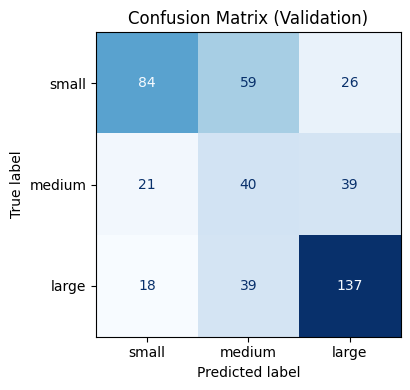

In [40]:
# ---------- Evaluasi & Saving ----------
# Muat best model (butuh custom_objects utk AttentionPooling)
best_model = tf.keras.models.load_model(ckpt_path, custom_objects={"AttentionPooling": AttentionPooling})

probs_val = best_model.predict(Xva, verbose=0)
y_pred_val = probs_val.argmax(axis=1)
y_true_val = y_val.argmax(axis=1)

acc = accuracy_score(y_true_val, y_pred_val)
f1m = f1_score(y_true_val, y_pred_val, average="macro")
f1w = f1_score(y_true_val, y_pred_val, average="weighted")

try:
    target_names
except NameError:
    target_names = [f"class_{i}" for i in range(num_classes)]

print("\n=== Validation Metrics (BiLSTM + Attention) ===")
print(f"Accuracy     : {acc:.4f}")
print(f"F1 (macro)   : {f1m:.4f}")
print(f"F1 (weighted): {f1w:.4f}\n")

# Laporan & Confusion Matrix
report_txt = classification_report(y_true_val, y_pred_val, target_names=target_names, digits=4)
print("Classification Report (Attention):\n", report_txt)

cm = confusion_matrix(y_true_val, y_pred_val, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, cmap="Blues", values_format='d', colorbar=False)
plt.title("Confusion Matrix (Validation)")
plt.tight_layout()
plt.show()

<div align="justify">

Analisa :

- Model BiLSTM+Attention mencapai akurasi 0,5637, F1-macro 0,5345, dan F1-weighted 0,5725. 
- Per kelas: small (P=0,683, R=0,497, F1=0,575), medium (P=0,290, R=0,400, F1=0,336), large (P=0,678, R=0,706, F1=0,692). 
- Confusion matrix menunjukkan kelas medium naik jelas: true medium = 40 (sebelumnya 21), false ke small turun dari 38 → 21, dan false ke large turun tipis (41 → 39). 
- Ada trade-off di small: recall turun (96→84), tapi false ke large jauh berkurang (49→26), sehingga precision small naik.
- Nilai F1-macro meningkat dari 0,4921 → 0,5345 
- Nilai F1-weighted meningkat dari 0,5375 → 0,5725
- Nilai akurasi meningkat 0,5508 → 0,5637
- Nilai F1 kelas medium juga meningkat dari 0,2456 → 0,3361

Kesimpulan: Model dengan Attention lebih seimbang antar-kelas (terutama memperbaiki kelas medium) dan menjadi kandidat terbaik saat ini; meski ada sedikit penurunan recall small, precision-nya naik dan performa keseluruhan meningkat.

# Model Saving

In [ ]:
# --- 0) Pastikan folder output ada ---
os.makedirs("models", exist_ok=True)

# --- 1) Layer AttentionPooling (mask tidak diteruskan) ---
class AttentionPooling(tf.keras.layers.Layer):
    def __init__(self, units=64, **kwargs):
        super().__init__(**kwargs)
        self.proj = Dense(units, activation='tanh')
        self.score = Dense(1)
        self.supports_masking = True
    def call(self, x, mask=None):
        s = self.score(self.proj(x))                          # (B,T,1)
        if mask is not None:
            s = s - 1e9 * (1.0 - tf.cast(mask[:, :, None], tf.float32))
        w = tf.nn.softmax(s, axis=1)                          # (B,T,1)
        return tf.reduce_sum(w * x, axis=1)                   # (B,D)
    def compute_mask(self, inputs, mask=None):
        return None

# --- 2) Builder versi EXPORT (tanpa kernel_initializer ber-seed) ---
def build_bilstm_attention_export(embed_dim, num_classes,
                                  lstm_units=(64,32),
                                  p_spatial=0.2, p_drop=0.2,
                                  l2=1e-6, mask_value=0.0, recurrent_dp=0.2):
    reg = regularizers.l2(l2)
    inp = Input(shape=(None, embed_dim), dtype=tf.float32)
    x = Masking(mask_value=mask_value)(inp)
    x = SpatialDropout1D(p_spatial)(x)

    x = Bidirectional(LSTM(lstm_units[0], return_sequences=True,
                           kernel_regularizer=reg, recurrent_dropout=recurrent_dp))(x)
    x = LayerNormalization()(x); x = Dropout(p_drop)(x)

    x = Bidirectional(LSTM(lstm_units[1], return_sequences=True,
                           kernel_regularizer=reg, recurrent_dropout=recurrent_dp))(x)
    x = LayerNormalization()(x); x = Dropout(p_drop)(x)

    x = AttentionPooling(units=64)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = Dropout(p_drop)(x)
    out = Dense(num_classes, activation='softmax')(x)
    return Model(inp, out, name="bilstm_attention_export")

# --- 3) Load best model (.keras) ---
best_path = "models/bilstm_attention_best.keras"
best = tf.keras.models.load_model(best_path,
                                  custom_objects={"AttentionPooling": AttentionPooling})

# --- 4) Bangun model export & copy bobot ---
embed_dim  = best.input_shape[-1]
num_classes = best.output_shape[-1]
export_model = build_bilstm_attention_export(embed_dim, num_classes,
                                             lstm_units=(64,32), p_spatial=0.2, p_drop=0.2,
                                             l2=1e-6, mask_value=0.0, recurrent_dp=0.2)
export_model.set_weights(best.get_weights())

# --- 5) Simpan dalam dua format ---
# a) Format Keras (praktis untuk Python)
infer_keras_path = "models/bilstm_attention_infer.keras"
export_model.save(infer_keras_path)  # Keras 3: wajib pakai ekstensi .keras

# b) Format SavedModel (untuk TF Serving / TFLite)
saved_dir = "models/bilstm_attention_savedmodel"
if os.path.exists(saved_dir):
    shutil.rmtree(saved_dir)  # optional bersihkan
export_model.export(saved_dir)       # Keras 3: gunakan .export() untuk SavedModel

print("✅ Export selesai:")
print(" - .keras   :", infer_keras_path)
print(" - SavedModel folder:", saved_dir)

# --- 6) Simpan label mapping (ubah sesuai label kamu bila perlu) ---
try:
    target_names  # jika sudah ada dari sesi sebelumnya
except NameError:
    target_names = [f"class_{i}" for i in range(num_classes)]

label_map = {i: target_names[i] for i in range(num_classes)}
with open("models/label_map.json", "w") as f:
    json.dump(label_map, f, indent=2)
print(" - label_map :", "models/label_map.json")

# simpan file vectorizer
vectorizer_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), dtype=tf.string),
    text_vectorization
])

# Simpan sebagai SavedModel
vectorizer_model.save("models/vectorizer_savedmodel")


/home/ser/miniconda3/envs/nlp_env/lib/python3.10/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'attention_pooling', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


INFO:tensorflow:Assets written to: models/bilstm_attention_savedmodel/assets


INFO:tensorflow:Assets written to: models/bilstm_attention_savedmodel/assets


Saved artifact at 'models/bilstm_attention_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, None, 128), dtype=tf.float32, name='keras_tensor_133')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  127644158128224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127644158273920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127644158274976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127644158272160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127644158266352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127644158271808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127644158277088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127644158271456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127644158273040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127644158277440: TensorSpec(shape=(), dtype=tf.resource, name=No

# Kesimpulan

<div align="justify">
Hasil keseluruhan dari pemrosesan data menggunakan Natural Languange Preprocessing (NLP) ini adalah model masih kurang dapat menebak atau memprediksi hasil khususnya pada kelas medium. Dikarenakan persebaran data cenderung tidak seimbang (imbalance data), jadi data hanya bisa menebak kelas mayoritas saja. Dan cenderung gagal menebak kelas minoritas (kelas medium). 
Rekomendasi untuk pengolahan kedepannnya adalah mencoba balancing data dengan metode lain yang lebih cocok dengan data yang seperti ini. Selain itu, dicoba kembali kombinasi parameter lainnya dengan pemilihan dense yang lebih besar. Namun, perlu diperhatikan kembali semakin banyak kombinasi dense atau neuron yang dipakai semakin lama juga pengolahan data saat training berlangsung.